In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [15]:
startup = pd.read_csv("50_Startups.csv")

In [16]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [18]:
startup[startup.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [19]:
startup.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [20]:
c=startup.corr()

<Axes: >

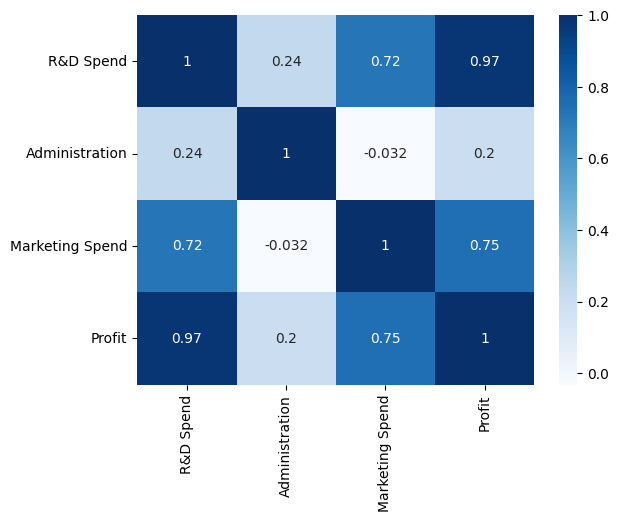

In [21]:
sns.heatmap(c,annot=True,cmap='Blues')

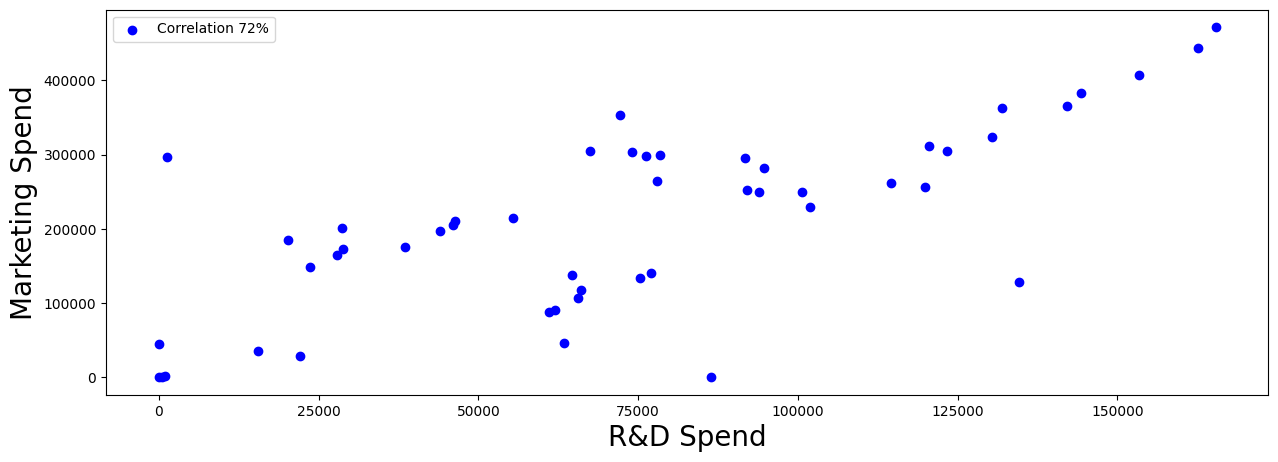

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
plt.scatter(startup["R&D Spend"],startup["Marketing Spend"],color="blue",label="Correlation 72%")
plt.xlabel("R&D Spend",size=20)
plt.ylabel("Marketing Spend",size=20)
plt.legend(loc="best")

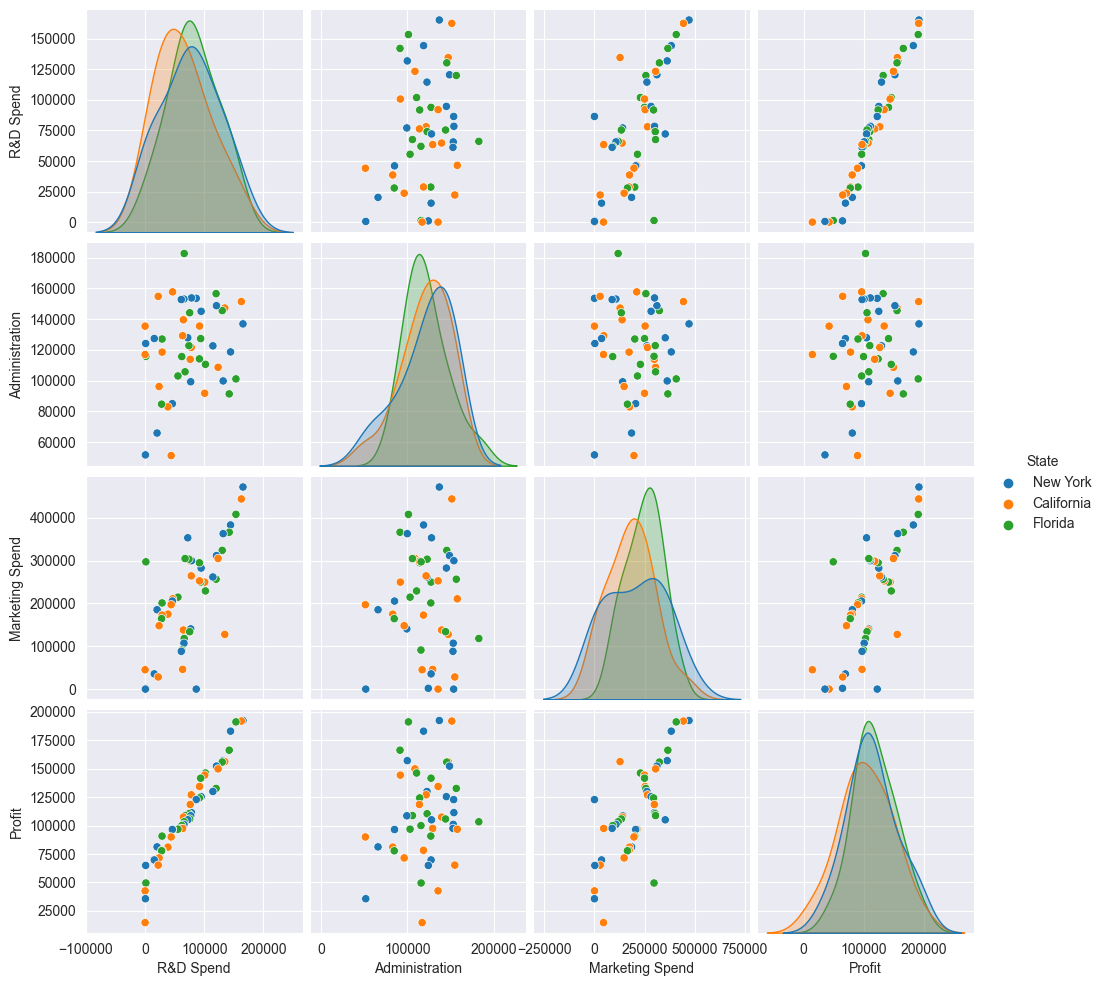

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(startup,hue='State')

# Inference:

In [24]:
#as we can see in above plot : * two independent features corelated-R&D spend is positively correlated with the Marketing spend 
 #* profit is no relation with the Administration

<Axes: >

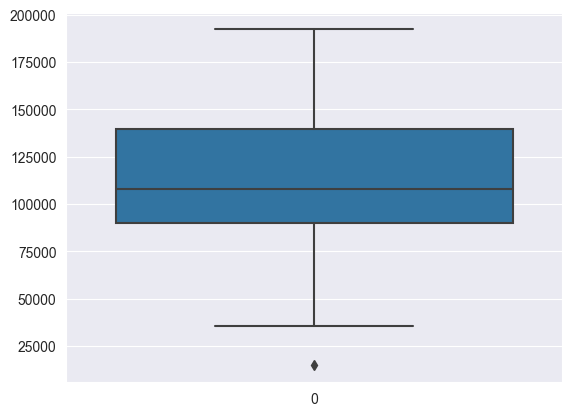

In [25]:
sns.boxplot(data=startup["Profit"] ,orient="v")

In [26]:
outlier=list(np.where(startup.Profit<25000))
print("outlier: " , outlier)

outlier:  [array([49], dtype=int64)]


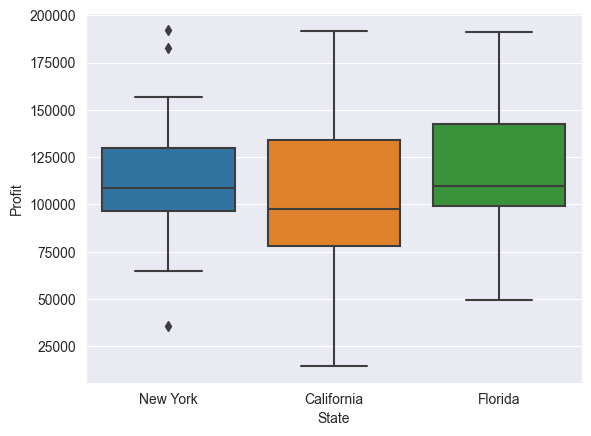

In [27]:
sns.boxplot(x="State",y="Profit",data=startup)
plt.show()

In [28]:
outlier2=list(np.where(startup.Profit>175000))
print("outlier: " , outlier)

outlier:  [array([49], dtype=int64)]


# Insights

In [29]:
#• Outlier is present in Profit, new York
#• startup located in california max profit and maxloss

# sk-learn model

In [30]:
x= startup.iloc[:,:-1].values
y=startup.iloc[:,4].values

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
 labelencoder=LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])
x1= pd.DataFrame(x)
x1.head()


,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


# Split the Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [35]:
# feature scaling usefull only when features have different units

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [37]:
y_pred = model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [38]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)
training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9355139722149948
Model Score/Performance on Training data 0.9515496105627431


In [39]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


 #inference:
by seeing above data predicted values are close to catual values so model can be used for prediction       
        

# Model Evaluation

In [40]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39448007716638


In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6224496238.946436


In [42]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  788954.7666974601


In [43]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6503.577323580026


# Conclusion sklearn model:
• mean absolute error is - 6503.577323580025 therefore it show that
• predicted value is 6503.577323580025 units more or less than the actual value.


# 1 - :Statistical model :-
• EDA
• Correlation Analysis
EDA AND CORRELATION ARE DONE IN STARTING
• Model Building
• Model Testing
• Model Validation Two Techniques: 1. Collinearity Check & 2. Residual Analysis.
• Model Deletion Diagnostics (checking Outliers or Influencers) Two Techniques : 1. Cook’s
Distance & 2. Leverage value
• Improving the Model
• Model Deletion Diagnostics and Final Model
• Model Predictions
• table containing R^2 value for each prepared model


In [44]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [45]:
startup1=startup.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

In [46]:
startup1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [47]:
statsmodel= smf.ols("Profit~RDS+ADMS+MKTS",data=startup1).fit()

In [48]:
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        17:43:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
statsmodel.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [50]:
print(statsmodel.tvalues, '\n', statsmodel.pvalues)

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64


# simple linear regression model

In [51]:
mdl1=smf.ols('Profit~RDS',data = startup1).fit()
#Tvakue & pvalue
print(mdl1.tvalues, '\n', mdl1.pvalues)

Intercept    19.320288
RDS          29.151139
dtype: float64 
 Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64


In [52]:
mdl2=smf.ols('Profit~ADMS',data = startup1).fit()
#t and p-Values
print(mdl2.tvalues, '\n', mdl2.pvalues)

Intercept    3.040044
ADMS         1.419493
dtype: float64 
 Intercept    0.003824
ADMS         0.162217
dtype: float64


In [53]:
mdl3=smf.ols('Profit~MKTS',data = startup1).fit()
#t and p-Values
print(mdl3.tvalues, '\n', mdl3.pvalues)

Intercept    7.808356
MKTS         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


In [54]:
mdl4=smf.ols("Profit~ADMS+MKTS",data=startup1).fit()
mdl4.tvalues , mdl4.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

# Model validation

In [55]:
#Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [56]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_r=smf.ols("RDS~ADMS+MKTS",data=startup1).fit().rsquared
vif_r=1/(1-rsq_r)
rsq_a=smf.ols("ADMS~RDS+MKTS",data=startup1).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_m=smf.ols("MKTS~RDS+ADMS",data=startup1).fit().rsquared
vif_m=1/(1-rsq_m)
# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


In [57]:
#2) Residual Analysis

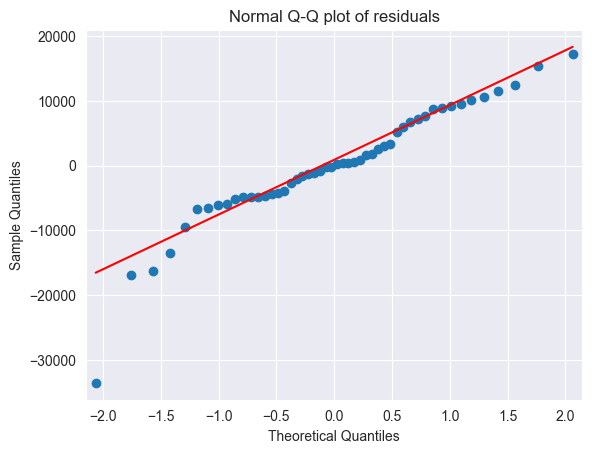

In [58]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(statsmodel.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [59]:
resid=list(np.where(statsmodel.resid<-30000))
print("outlier: " , resid)


outlier:  [array([49], dtype=int64)]


In [60]:
#Test for Homoscedasticity or Heteroscedasticity (plotting model’s standardized fitted values vs standardized residual values)

In [61]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

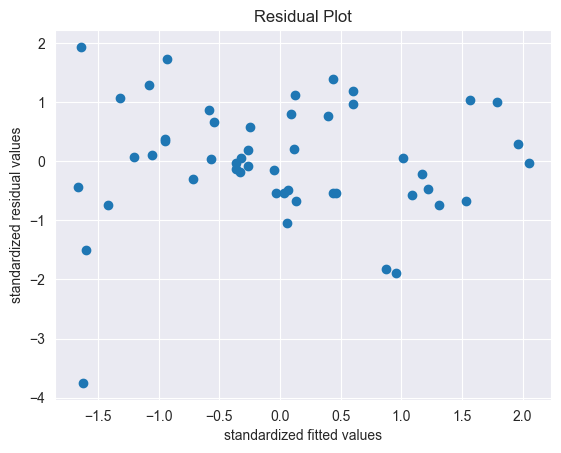

In [62]:
plt.scatter(standard_values(statsmodel.fittedvalues),standard_values(statsmodel.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()


IN ABOVE PLOT-No pattern no relation hence there is no relation btw errors and fitted values

In [63]:
list(np.where(standard_values(statsmodel.resid)<-3))

[array([49], dtype=int64)]

Test for errors or Residuals Vs Regressors or independent ‘x’ variables or predictors
using Residual Regression Plots code graphics.plot_regress_exog(model,‘x’,fig) #
exog = x-variable & endog = y-variable

eval_env: 1


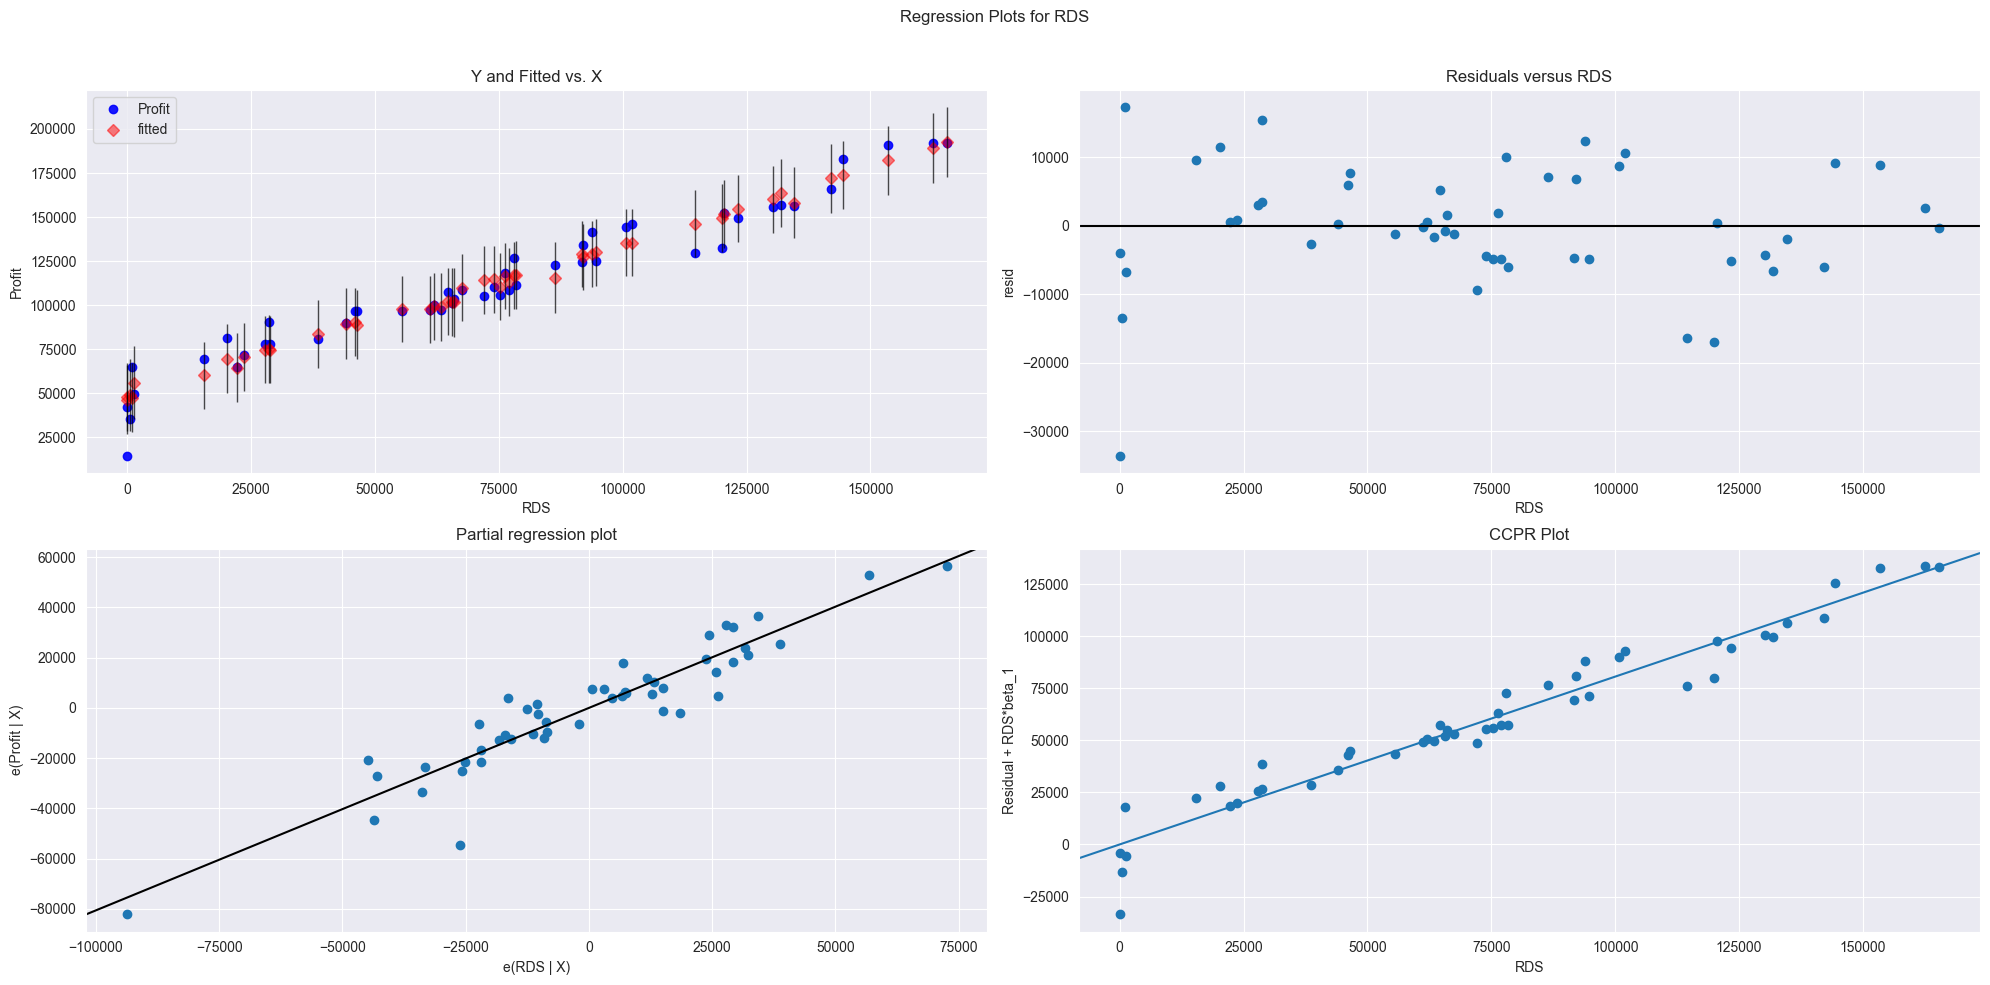

In [64]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(statsmodel,'RDS',fig=fig)
plt.show()

eval_env: 1


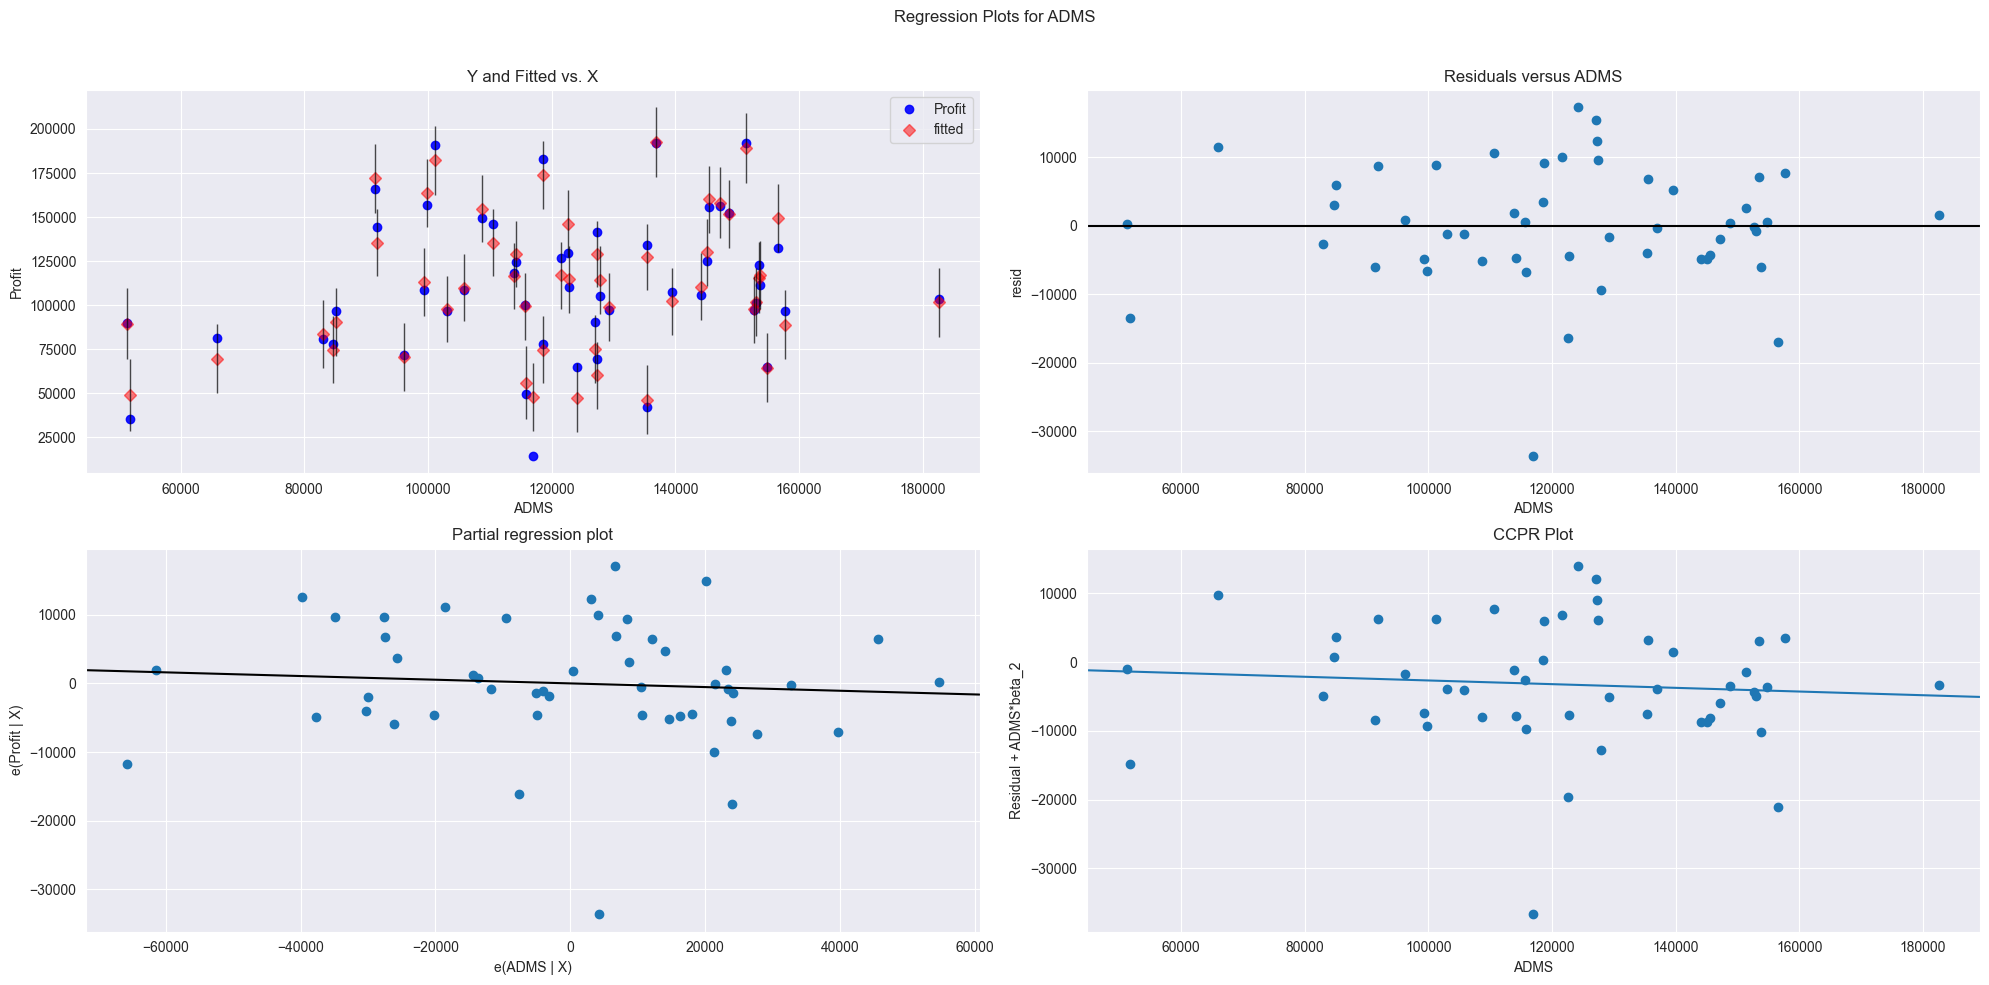

In [65]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(statsmodel,'ADMS',fig=fig)
plt.show()

eval_env: 1


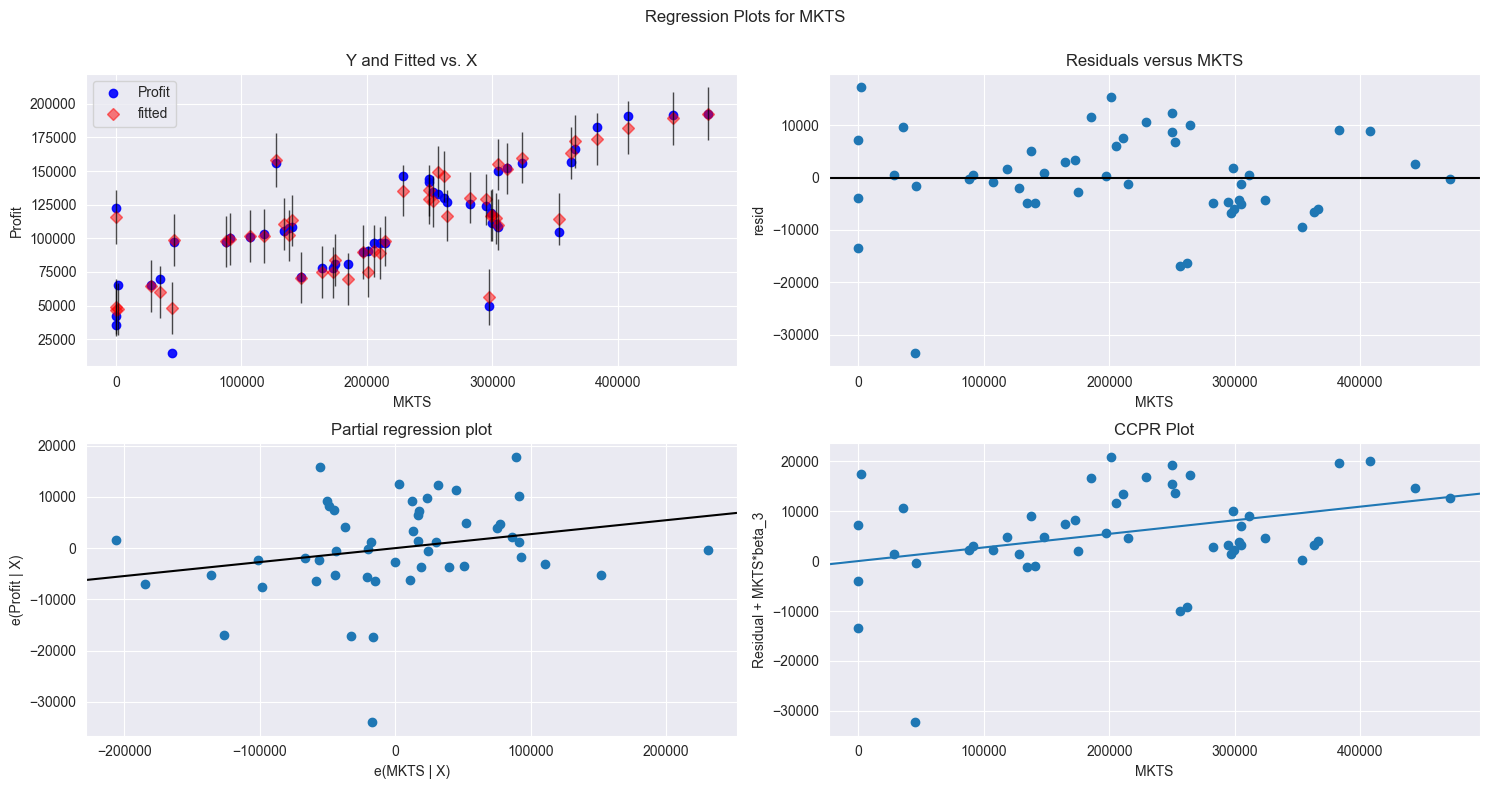

In [66]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(statsmodel,'MKTS',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

Two Techniques : 1. Cook’s Distance & 2. Leverage value

In [67]:
#cook's Distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = statsmodel.get_influence()
(c, _) = model_influence.cooks_distance

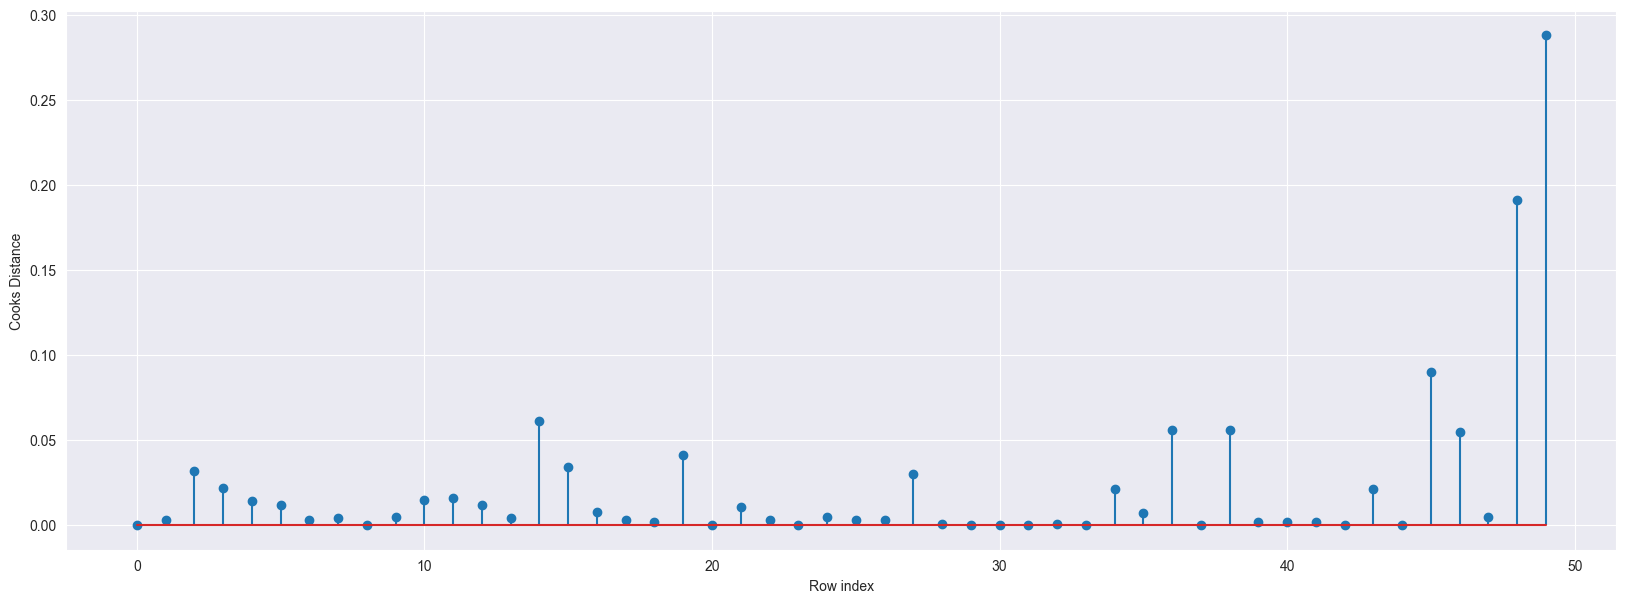

In [68]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [69]:
#index and value of influencer where c>0.5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

# Leverage value

In [70]:
startup1.shape

(50, 5)

In [71]:
k = startup1.shape[1]
n = startup1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

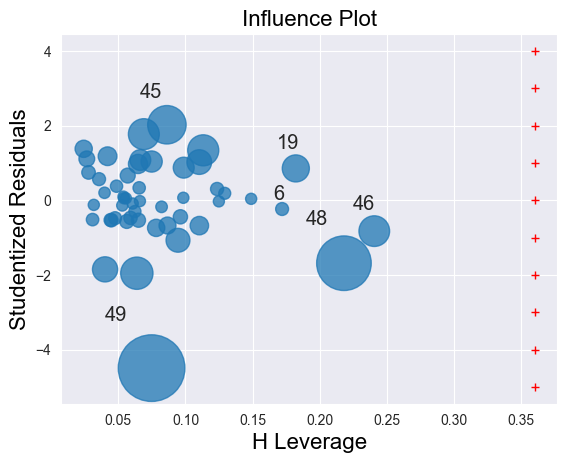

In [72]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
influence_plot(statsmodel,alhpa=0.5)
y=[i for i in range(-5,5)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [73]:
startup1[startup1.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model

In [74]:
startup2=startup1.drop(startup1.index[[49]],axis=0).reset_index(drop=True)
startup2


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [76]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=startup2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    startup2=startup2.drop(startup2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup2
else:
    final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=startup2).fit()
    final_model.rsquared , final_model.aic
print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [77]:
final_model.rsquared

0.9613162435129847

In [78]:
startup2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# —–Model transformation——

In [79]:
#MODEL—1

In [80]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        17:54:06   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADMS          -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
#Model—2

In [82]:
statsmodel2=smf.ols("Profit~np.log(RDS+ADMS+MKTS)",data=startup2).fit()

In [83]:
statsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     88.52
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.20e-12
Time:                        17:55:48   Log-Likelihood:                -560.02
No. Observations:                  49   AIC:                             1124.
Df Residuals:                      47   BIC:                             1128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -6.833e+05   8.48e+04     -8.057      0.000   -8.54e+05   -5.13e+05
np.log(RDS + ADMS + MKTS)  6.215e+04   6605.085      9.409      0.000    4.89e+04    7.54e+04
==============================================================================
Omnibus:                        2.043   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.171
Skew:                          -0.181   Prob(JB):                        0.557
Kurtosis:                       3.665   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# model—3

In [85]:
statsmodel3=smf.ols("np.log(Profit)~RDS+ADMS+MKTS",data=startup2).fit()

In [86]:
statsmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     128.7
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.31e-22
Time:                        17:56:51   Log-Likelihood:                 34.801
No. Observations:                  49   AIC:                            -61.60
Df Residuals:                      45   BIC:                            -54.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9256      0.089    123.151      0.000      10.747      11.104
RDS         7.246e-06   6.12e-07     11.834      0.000    6.01e-06    8.48e-06
ADMS        4.864e-07   6.86e-07      0.709      0.482   -8.96e-07    1.87e-06
MKTS        2.445e-07   2.21e-07      1.105      0.275   -2.01e-07     6.9e-07
==============================================================================
Omnibus:                       29.355   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.144
Skew:                          -1.748   Prob(JB):                     5.28e-14
Kurtosis:                       7.211   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
 #Model—-4

In [88]:
RDSsqr=(startup2.RDS**2)
ADMSsqr=(startup2.ADMS**2)
MKTSsqr=(startup2.MKTS**2)

In [90]:
statsmodel4=smf.ols("np.log(Profit)~RDS+RDSsqr+ADMS+ADMSsqr+MKTS+MKTSsqr",data=startup2).fit()

In [92]:
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        17:58:49   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Predictions using best model

In [93]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':60000,"ADMS":80000,"MKTS":160000},index=[0])
new_data

,RDS,ADMS,MKTS
0,60000,80000,160000


In [94]:
final_model.predict(new_data)

0    101623.822196
dtype: float64

In [95]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(startup2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# ——–Table containing R^2 value for each prepared model——–

In [96]:
d2={'Prep_Models':['statsmodel','statsmodel2','statsmodel3','statsmodel4','Final_Model','skleranmodelr2 score'],'Rsquared':[statsmodel.rsquared,statsmodel2.rsquared,statsmodel3.rsquared,statsmodel4.rsquared,final_model.rsquared,r2_score(y_pred, y_test)]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,statsmodel,0.950746
1,statsmodel2,0.653197
2,statsmodel3,0.895587
3,statsmodel4,0.937729
4,Final_Model,0.961316
5,skleranmodelr2 score,0.933945
